# Install and use of sentiment modal

In [1]:
!pip install datasets transformers

Defaulting to user installation because normal site-packages is not writeable


In [2]:
pip install transformers

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
from transformers import pipeline

/usr/local/anaconda3/latest/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")
print(sentiment_analysis("Are you sure you can keep up? You seem really weak at the moment"))

[{'label': 'NEGATIVE', 'score': 0.9989456534385681}]


In [6]:
import numpy as np

# Sentiment Maze enviroment setup

### Small Maze

In [7]:
botReponses_mazeSmall = {(0,3):"It's annoying how slow you are",
              (1,2): "Wow what an amazing job",
              (3,0): "Wow you're really bad at this"
              }

maze_small = np.array([['A',0,0,'B'],
             [0,0,'B','P'],
             ['P',0,0,0],
             ['B',0,0,'G']])
print(maze_small)

[['A' '0' '0' 'B']
 ['0' '0' 'B' 'P']
 ['P' '0' '0' '0']
 ['B' '0' '0' 'G']]


### Bigger Maze

In [208]:
biggerMaze=np.array([['P',0,'W',0,0,0,0,'W',0,'A'],
             ['P',0,'W',0,0,0,0,'W',0,0],
             ['P',0,'W',0,0,0,0,'W',0,'B'],
             ['P',0,'W',0,0,0,0,'B',0,0],
             ['P',0,'W',0,'B','W',0,0,0,0],
             [0,0,'B',0,0,'W',0,0,0,0],
             [0,0,0,0,0,'W',0,0,0,0],
             [0,0,0,0,0,'W',0,0,0,0],
             [0,0,'B',0,0,'W',0,0,0,0],
             ['G',0,0,0,0,'W',0,0,0,0]])


botResponses_allPositiveBots={
    (2,9):"Keep up the awesome work, you're doing so well",
    (3,7):"You've been working hard and I really see the growth in you",
    (4,4):"Can't believe you found my cat, I'm so grateful!",
    (5,2):"I've been waiting to finally meet you.",
    (8,2):"Please accept this token of gratitude!"
}


botResponses_oneNegativeBots={
    (2,9):"Keep up the awesome work, you're doing so well",
    (3,7):"You've been working hard and I really see the growth in you",
    (4,4):"Can't believe you found my cat, I'm so grateful!",
    (5,2):"I've been waiting to finally meet you.",
    (8,2):"You are so bad at this."
}

botResponses_twoNegativeBots={
    (2,9):"Are you sure you can keep up? You seem really weak at the moment",
    (3,7):"You've been working hard and I really see the growth in you",
    (4,4):"Can't believe you found my cat, I'm so grateful!",
    (5,2):"I've been waiting to finally meet you.",
    (8,2):"You are so bad at this."
}

print(biggerMaze)

[['P' '0' 'W' '0' '0' '0' '0' 'W' '0' 'A']
 ['P' '0' 'W' '0' '0' '0' '0' 'W' '0' '0']
 ['P' '0' 'W' '0' '0' '0' '0' 'W' '0' 'B']
 ['P' '0' 'W' '0' '0' '0' '0' 'B' '0' '0']
 ['P' '0' 'W' '0' 'B' 'W' '0' '0' '0' '0']
 ['0' '0' 'B' '0' '0' 'W' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' 'W' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' 'W' '0' '0' '0' '0']
 ['0' '0' 'B' '0' '0' 'W' '0' '0' '0' '0']
 ['G' '0' '0' '0' '0' 'W' '0' '0' '0' '0']]


## Enviroment 

In [8]:
import warnings
import copy
warnings.simplefilter(action='ignore', category=FutureWarning)

class Maze(object):
    def __init__(self, maze, botResponses):
        self.maze = np.copy(maze)
        self.botResponses = botResponses
        self.mazeSize = maze.shape
        
        #find position of A in maze and assign it to 
        #self.agentPosition = (0,0)
        for i in range(self.mazeSize[0]):
            for j in range(self.mazeSize[1]):
                if self.maze[i][j]=='A':
                    self.agentPosition= (i,j)
                    break
       
        self.initialAgentPosition = self.agentPosition
        self.actions = ['U','D','L','R']
        self.visitedBots = []
        self.stateSpacePlus = [i for i in range(self.mazeSize[0]*self.mazeSize[1])]
        
        
    def reset(self):
        initRow, initCol = self.initialAgentPosition
        self.updateMaze(initRow, initCol)
        self.maze[initRow][initCol] = 'A'
        self.visitedBots = []
        return self.agentPosition
        
    def isGoalState(self, row,col):
        if self.maze[row][col]=='G':
            return True
        return False
        
    #Check for edges of the maze and wall for later
    def checkIfValidPosition(self,row,col):
        #check upper limit and lowerlimit for coordinates, return true is position is valid.
        #also check if position coincides with any wall position or obstacles.
        
        if (row<0) or (row >= self.mazeSize[0]):
            return False
        elif (col<0) or (col >= self.mazeSize[1]):
            return False
        elif self.maze[row][col] == 'W':
            return False
        else:
            return True
        
    def getNewPosition(self, action):
        currentPosition = self.agentPosition
        row,col = currentPosition
        if action=='U':
            return (row-1,col)
        elif action=='D':
            return (row+1,col)
        elif action=='L':
            return (row, col-1)
        elif action=='R':
            return (row,col+1)
        else:
            return "Action is not valid."
    
    def getSentiment(self, row,col):     
        # returns POSITIVE/NEGATIVE/NUETRAL
        #finding the bot's response 
        sentimentFound = 'NUETRAL'
        
        if (row,col) not in self.visitedBots:
            if (row,col) in self.botResponses:
                response = self.botResponses[(row,col)]                
                sentimentFound = sentiment_analysis(response)[0]['label']   
                self.visitedBots.append((row,col))

        return sentimentFound
    
    def updateMaze(self, newRow, newCol):
        #Updating Agent's new position in maze
        valAtNewPosition = self.maze[newRow][newCol]
        
        if valAtNewPosition == '0':
            self.maze[newRow][newCol] = 'A'
        # X means AB (agent and bot at same position)    
        elif valAtNewPosition == 'B':
            self.maze[newRow][newCol] = 'X'

            
        #Updating Agent's old position in maze
        agentRow, agentCol = self.agentPosition
        
        valAtAgentPosition = self.maze[agentRow][agentCol]
        if valAtAgentPosition == 'A':
            self.maze[agentRow][agentCol] = '0'
            
        elif valAtAgentPosition == 'X':
            self.maze[agentRow][agentCol] = 'B'
        
        #updating position vals
        self.agentPosition = newRow, newCol
        
#   step returns: agentPosition, reward, done, info    
    def step(self, action):
        
        newRow, newCol = self.getNewPosition(action)
       
       
        if self.checkIfValidPosition(newRow, newCol):
            if self.isGoalState(newRow, newCol):
                return (newRow, newCol), 100, True, None
            
            elif self.maze[newRow][newCol]=='P':                #condition for pit
                return (newRow, newCol), -20, True, None
            
            else:     
                self.updateMaze(newRow,newCol)
                
                sentiment = self.getSentiment(newRow, newCol)     
                points = -1
                if sentiment == "POSITIVE":
                    points = 20
                elif sentiment == "NEGATIVE":
                    points = -20
                    
                    
                return self.agentPosition, points, False, None
                    
        else:
            return self.agentPosition, -1, False, None

###  Testing enviroment

In [98]:
biggerEnv=Maze(biggerMaze, botResponses_someNegativeBots)
print(biggerEnv.reset())
print(biggerEnv.maze)
print(biggerEnv.step('D'))
print(biggerEnv.step('D'))
print(biggerEnv.step('D'))
print(biggerEnv.step('R'))
print(biggerEnv.step('L'))
print(biggerEnv.step('L'))
biggerEnv.reset()
print(biggerEnv.agentPosition)

(0, 9)
[['P' '0' 'W' '0' '0' '0' '0' 'W' '0' 'A']
 ['P' '0' 'W' '0' '0' '0' '0' 'W' '0' '0']
 ['P' '0' 'W' '0' '0' '0' '0' 'W' '0' 'B']
 ['P' '0' 'W' '0' '0' '0' '0' 'B' '0' '0']
 ['P' '0' 'W' '0' 'B' 'W' '0' '0' '0' '0']
 ['0' '0' 'B' '0' '0' 'W' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' 'W' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' 'W' '0' '0' '0' '0']
 ['0' '0' 'B' '0' '0' 'W' '0' '0' '0' '0']
 ['G' '0' '0' '0' '0' 'W' '0' '0' '0' '0']]
((1, 9), -1, False, None)
((2, 9), 20, False, None)
((3, 9), -1, False, None)
((3, 9), -1, False, None)
((3, 8), -1, False, None)
((3, 7), 20, False, None)
(0, 9)


# Reinforcement Learning Agent

### Code for RL using Q-learning 

In [9]:
import matplotlib.pyplot as plt
import time

EPSILON = 0.1
ALPHA = 0.1
GAMMA = 0.95

#used for the q-table in this context
def getStateFromCoordinate(state, maze):
    row, col = state
    maze_col_len = len(maze[0])
    return int(maze_col_len*row + col)

def policy(state, q_table, explore=0.0):
    action = int(np.argmax(q_table[state]))
    if np.random.random() <= explore:
        action = int(np.random.randint(low=0, high=4, size=1))
    return action

def AgentForReinforcementLearning(NUM_EPISODES, env):
    q_table = np.zeros(shape=((env.mazeSize[0]*env.mazeSize[1]),4))
    print("For maze:")
    print(env.maze)
    
    totalRewards = np.zeros(NUM_EPISODES)
    totalLenght = np.zeros(NUM_EPISODES)
    totalTime = np.zeros(NUM_EPISODES)
    
    print("Graph for episode lenght of "+str(NUM_EPISODES)+":")
    for episode in range(NUM_EPISODES):
        # Initializing episode
        done = False
        total_reward = 0
        episode_length = 0
        beforeTime = time.perf_counter()
        state = getStateFromCoordinate(env.reset(), env.maze)
        
        # For every step of the episode
        while not done:
            # Select an action according to policy
            q_action = policy(state,q_table, EPSILON)
            action = env.actions[q_action]
            # Take the action in the environment
            next_state_coor, reward, done, _ = env.step(action)
            
            next_state = getStateFromCoordinate(next_state_coor, env.maze)
            # Select the optimal action of the next state
            q_next_action = policy(next_state, q_table)
            # Q-Learning update
            q_table[state][q_action] += ALPHA * (reward + GAMMA * q_table[next_state][q_next_action] - q_table[state][q_action])

            state = next_state

            total_reward += reward
            episode_length += 1
        
        totalRewards[episode] = total_reward
        totalLenght[episode] = episode_length
        
        print("Episode:", episode, "Length:", episode_length, "Total Reward: ", total_reward)
        afterTime = time.perf_counter()
        timeTaken = afterTime - beforeTime
        totalTime[episode] = timeTaken

    print("Graph for rewards:")
    plt.plot(totalRewards)
    plt.show()
    
    print("Graph for lenght:")
    plt.plot(totalLenght)
    plt.show()
    
    print("Graph for time:")
    plt.plot(totalTime)
    plt.show()
    print(totalTime)
    return (q_table, totalRewards,totalLenght)

For maze:
[['A' '0' '0' 'B']
 ['0' '0' 'B' 'P']
 ['P' '0' '0' '0']
 ['B' '0' '0' 'G']]
Graph for episode lenght of 700:
Episode: 0 Length: 5 Total Reward:  -24
Episode: 1 Length: 45 Total Reward:  -43
Episode: 2 Length: 41 Total Reward:  -39
Episode: 3 Length: 15 Total Reward:  -13
Episode: 4 Length: 9 Total Reward:  -28
Episode: 5 Length: 57 Total Reward:  -93
Episode: 6 Length: 42 Total Reward:  80
Episode: 7 Length: 17 Total Reward:  -34
Episode: 8 Length: 31 Total Reward:  91
Episode: 9 Length: 46 Total Reward:  76
Episode: 10 Length: 7 Total Reward:  94
Episode: 11 Length: 22 Total Reward:  100
Episode: 12 Length: 40 Total Reward:  82
Episode: 13 Length: 4 Total Reward:  -23
Episode: 14 Length: 18 Total Reward:  83
Episode: 15 Length: 6 Total Reward:  116
Episode: 16 Length: 14 Total Reward:  108
Episode: 17 Length: 7 Total Reward:  115
Episode: 18 Length: 7 Total Reward:  115
Episode: 19 Length: 6 Total Reward:  116
Episode: 20 Length: 6 Total Reward:  116
Episode: 21 Length: 7 T

Episode: 195 Length: 6 Total Reward:  116
Episode: 196 Length: 6 Total Reward:  116
Episode: 197 Length: 6 Total Reward:  95
Episode: 198 Length: 8 Total Reward:  114
Episode: 199 Length: 7 Total Reward:  115
Episode: 200 Length: 6 Total Reward:  116
Episode: 201 Length: 6 Total Reward:  116
Episode: 202 Length: 8 Total Reward:  114
Episode: 203 Length: 6 Total Reward:  116
Episode: 204 Length: 6 Total Reward:  116
Episode: 205 Length: 7 Total Reward:  115
Episode: 206 Length: 6 Total Reward:  116
Episode: 207 Length: 6 Total Reward:  116
Episode: 208 Length: 7 Total Reward:  115
Episode: 209 Length: 6 Total Reward:  116
Episode: 210 Length: 10 Total Reward:  112
Episode: 211 Length: 6 Total Reward:  116
Episode: 212 Length: 8 Total Reward:  114
Episode: 213 Length: 6 Total Reward:  116
Episode: 214 Length: 8 Total Reward:  114
Episode: 215 Length: 6 Total Reward:  116
Episode: 216 Length: 6 Total Reward:  116
Episode: 217 Length: 7 Total Reward:  115
Episode: 218 Length: 6 Total Rewar

Episode: 393 Length: 6 Total Reward:  116
Episode: 394 Length: 8 Total Reward:  114
Episode: 395 Length: 6 Total Reward:  116
Episode: 396 Length: 6 Total Reward:  95
Episode: 397 Length: 4 Total Reward:  -23
Episode: 398 Length: 6 Total Reward:  116
Episode: 399 Length: 8 Total Reward:  114
Episode: 400 Length: 6 Total Reward:  116
Episode: 401 Length: 4 Total Reward:  -2
Episode: 402 Length: 6 Total Reward:  116
Episode: 403 Length: 6 Total Reward:  116
Episode: 404 Length: 8 Total Reward:  114
Episode: 405 Length: 6 Total Reward:  116
Episode: 406 Length: 6 Total Reward:  116
Episode: 407 Length: 6 Total Reward:  116
Episode: 408 Length: 6 Total Reward:  116
Episode: 409 Length: 6 Total Reward:  116
Episode: 410 Length: 7 Total Reward:  115
Episode: 411 Length: 8 Total Reward:  114
Episode: 412 Length: 6 Total Reward:  116
Episode: 413 Length: 6 Total Reward:  116
Episode: 414 Length: 6 Total Reward:  116
Episode: 415 Length: 8 Total Reward:  114
Episode: 416 Length: 6 Total Reward:

Episode: 589 Length: 6 Total Reward:  116
Episode: 590 Length: 6 Total Reward:  116
Episode: 591 Length: 6 Total Reward:  116
Episode: 592 Length: 7 Total Reward:  115
Episode: 593 Length: 6 Total Reward:  116
Episode: 594 Length: 6 Total Reward:  116
Episode: 595 Length: 6 Total Reward:  116
Episode: 596 Length: 6 Total Reward:  116
Episode: 597 Length: 6 Total Reward:  116
Episode: 598 Length: 4 Total Reward:  -2
Episode: 599 Length: 8 Total Reward:  -6
Episode: 600 Length: 6 Total Reward:  116
Episode: 601 Length: 10 Total Reward:  93
Episode: 602 Length: 6 Total Reward:  95
Episode: 603 Length: 6 Total Reward:  116
Episode: 604 Length: 12 Total Reward:  110
Episode: 605 Length: 6 Total Reward:  116
Episode: 606 Length: 6 Total Reward:  116
Episode: 607 Length: 6 Total Reward:  116
Episode: 608 Length: 6 Total Reward:  116
Episode: 609 Length: 6 Total Reward:  116
Episode: 610 Length: 6 Total Reward:  116
Episode: 611 Length: 6 Total Reward:  95
Episode: 612 Length: 7 Total Reward: 

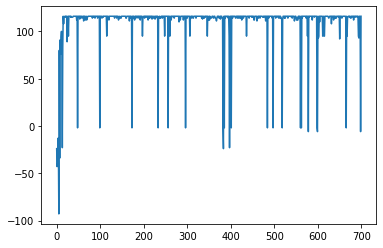

Graph for lenght:


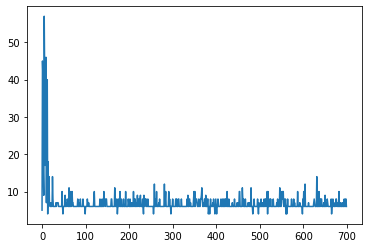

Graph for time:


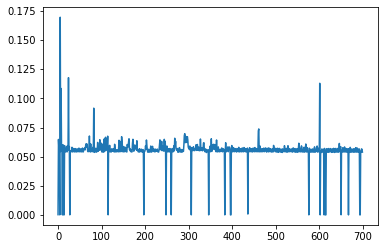

[3.26365000e-04 6.48468130e-02 5.69974079e-02 5.45509749e-02
 1.39005948e-04 1.69686873e-01 5.44816330e-02 1.08572744e-01
 5.61464180e-02 5.81526319e-02 1.33501133e-04 6.03752648e-02
 5.60774182e-02 1.02260849e-04 2.12622108e-04 5.95642040e-02
 5.53012281e-02 5.42460771e-02 5.42628048e-02 5.57789251e-02
 5.89178929e-02 5.42074922e-02 5.93066548e-02 5.89588261e-02
 1.17861162e-01 5.56874620e-02 5.87513610e-02 1.62500888e-04
 5.52067780e-02 5.43381791e-02 5.42645601e-02 5.53434170e-02
 5.81295330e-02 5.41998169e-02 5.42537400e-02 5.58988201e-02
 5.71280150e-02 5.43367930e-02 5.41821918e-02 5.65703942e-02
 5.69850921e-02 5.42146340e-02 5.41294930e-02 5.64393748e-02
 5.68217800e-02 5.44450472e-02 5.42093501e-02 5.58929830e-02
 5.74255290e-02 5.55212419e-02 5.41793180e-02 5.63922198e-02
 5.67907211e-02 5.43096100e-02 5.42445602e-02 5.57569540e-02
 5.74456491e-02 5.41941230e-02 5.41814100e-02 5.61616961e-02
 5.71001552e-02 5.74710730e-02 5.58212840e-02 5.85846789e-02
 6.09681620e-02 6.111623

In [10]:
smallerEnv = Maze(maze_small,botReponses_mazeSmall)
smallQ, smallQRewards, smallQLenght = AgentForReinforcementLearning(700, smallerEnv)
print(smallQ)

### Graphs for Q-Learning on Small Maze

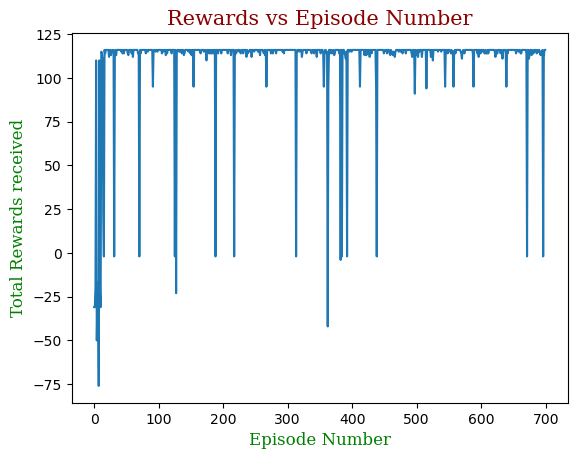

In [93]:
font1 = {'family':'serif','color':'darkred','size':15}
font2 = {'family':'serif','color':'green','size':12}

plt.plot(smallQRewards[:700])
plt.xlabel("Episode Number", fontdict=font2)
plt.ylabel("Total Rewards received", fontdict=font2)
plt.title("Rewards vs Episode Number", fontdict=font1)
plt.show()

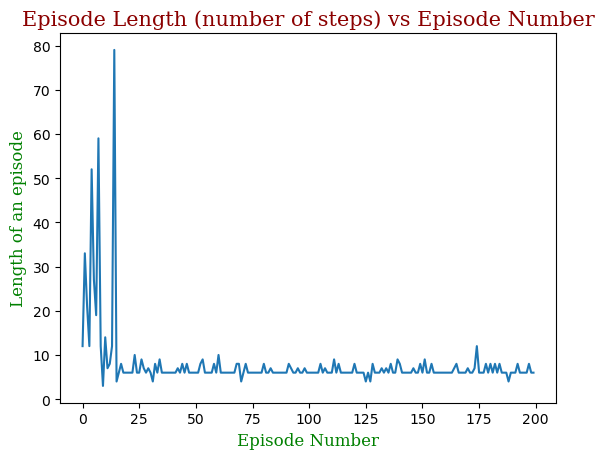

In [94]:
plt.plot(smallQLenght[:200])
plt.xlabel("Episode Number",fontdict=font2)
plt.ylabel("Length of an episode",fontdict=font2)
plt.title("Episode Length (number of steps) vs Episode Number",fontdict=font1)
plt.show()

### Code for RL using SARSA

In [113]:
import matplotlib.pyplot as plt
import time

EPSILON = 0.1
ALPHA = 0.1
GAMMA = 0.95

def getStateFromCoordinate(state, maze):
    row, col = state
    maze_col_len = len(maze[0])
    return int(maze_col_len*row + col)

def policy(state, q_table, explore=0.0):
    action = int(np.argmax(q_table[state]))
    if np.random.random() <= explore:
        action = int(np.random.randint(low=0, high=4, size=1))
    return action

def RLWithSarsa(NUM_EPISODES, env):
    q_table = np.zeros(shape=((env.mazeSize[0]*env.mazeSize[1]),4))
    print("For maze:")
    print(env.maze)
    
    totalRewards = np.zeros(NUM_EPISODES)
    totalLenght = np.zeros(NUM_EPISODES)
    totalTime = np.zeros(NUM_EPISODES)
    print("Graph for episode length of "+str(NUM_EPISODES)+":")

    for episode in range(NUM_EPISODES):
        # Initializing episode
        done = False
        total_reward = 0
        episode_length = 0
        beforeTime = time.perf_counter()
        state = getStateFromCoordinate(env.reset(), env.maze)

        # Select an action according to policy
        q_action = policy(state, q_table, EPSILON)
        action = env.actions[q_action]
        # For every step of the episode
        while not done:
            # Take the action in the environment
            next_state_coor, reward, done, _ = env.step(action)

            next_state = getStateFromCoordinate(next_state_coor, env.maze)
            
            q_next_action = policy(next_state, q_table, EPSILON)
            
            q_table[state][q_action] += ALPHA * (reward + GAMMA * q_table[next_state][q_next_action] - q_table[state][q_action])

            state = next_state
            action = env.actions[q_next_action]
            q_action=q_next_action

            total_reward += reward
            episode_length += 1
            
        totalRewards[episode] = total_reward
        totalLenght[episode] = episode_length    
        
        print("Episode:", episode, "Length:", episode_length, "Total Reward: ", total_reward)
        
        afterTime = time.perf_counter()
        timeTaken = afterTime - beforeTime
            
        totalTime[episode] = timeTaken
          

    plt.plot(totalRewards)

    plt.show()
    
    print("Graph for length:")
    plt.plot(totalLenght)

    plt.show()
    
    print("Graph for time:")
    plt.plot(totalTime)
    plt.show()
    
    return (q_table, totalRewards,totalLenght)

For maze:
[['0' '0' '0' 'B']
 ['0' '0' 'X' 'P']
 ['P' '0' '0' '0']
 ['B' '0' '0' 'G']]
Graph for episode length of 700:
Episode: 0 Length: 42 Total Reward:  -40
Episode: 1 Length: 6 Total Reward:  -4
Episode: 2 Length: 17 Total Reward:  -15
Episode: 3 Length: 26 Total Reward:  -24
Episode: 4 Length: 36 Total Reward:  -34
Episode: 5 Length: 48 Total Reward:  -65
Episode: 6 Length: 9 Total Reward:  -7
Episode: 7 Length: 23 Total Reward:  99
Episode: 8 Length: 67 Total Reward:  -84
Episode: 9 Length: 36 Total Reward:  86
Episode: 10 Length: 4 Total Reward:  -23
Episode: 11 Length: 35 Total Reward:  87
Episode: 12 Length: 50 Total Reward:  72
Episode: 13 Length: 13 Total Reward:  109
Episode: 14 Length: 8 Total Reward:  114
Episode: 15 Length: 14 Total Reward:  108
Episode: 16 Length: 6 Total Reward:  116
Episode: 17 Length: 7 Total Reward:  115
Episode: 18 Length: 6 Total Reward:  116
Episode: 19 Length: 6 Total Reward:  116
Episode: 20 Length: 6 Total Reward:  116
Episode: 21 Length: 6 T

Episode: 195 Length: 8 Total Reward:  114
Episode: 196 Length: 8 Total Reward:  -6
Episode: 197 Length: 8 Total Reward:  114
Episode: 198 Length: 6 Total Reward:  116
Episode: 199 Length: 8 Total Reward:  114
Episode: 200 Length: 6 Total Reward:  116
Episode: 201 Length: 6 Total Reward:  116
Episode: 202 Length: 6 Total Reward:  116
Episode: 203 Length: 6 Total Reward:  116
Episode: 204 Length: 6 Total Reward:  116
Episode: 205 Length: 6 Total Reward:  116
Episode: 206 Length: 6 Total Reward:  116
Episode: 207 Length: 6 Total Reward:  116
Episode: 208 Length: 6 Total Reward:  116
Episode: 209 Length: 10 Total Reward:  112
Episode: 210 Length: 10 Total Reward:  112
Episode: 211 Length: 8 Total Reward:  114
Episode: 212 Length: 10 Total Reward:  112
Episode: 213 Length: 7 Total Reward:  115
Episode: 214 Length: 4 Total Reward:  -2
Episode: 215 Length: 6 Total Reward:  116
Episode: 216 Length: 6 Total Reward:  116
Episode: 217 Length: 6 Total Reward:  116
Episode: 218 Length: 7 Total Rewa

Episode: 392 Length: 6 Total Reward:  116
Episode: 393 Length: 6 Total Reward:  116
Episode: 394 Length: 6 Total Reward:  116
Episode: 395 Length: 6 Total Reward:  116
Episode: 396 Length: 6 Total Reward:  116
Episode: 397 Length: 7 Total Reward:  115
Episode: 398 Length: 6 Total Reward:  116
Episode: 399 Length: 6 Total Reward:  116
Episode: 400 Length: 6 Total Reward:  116
Episode: 401 Length: 6 Total Reward:  116
Episode: 402 Length: 6 Total Reward:  116
Episode: 403 Length: 8 Total Reward:  114
Episode: 404 Length: 9 Total Reward:  113
Episode: 405 Length: 6 Total Reward:  116
Episode: 406 Length: 8 Total Reward:  114
Episode: 407 Length: 6 Total Reward:  116
Episode: 408 Length: 6 Total Reward:  116
Episode: 409 Length: 6 Total Reward:  116
Episode: 410 Length: 10 Total Reward:  112
Episode: 411 Length: 6 Total Reward:  116
Episode: 412 Length: 6 Total Reward:  116
Episode: 413 Length: 6 Total Reward:  116
Episode: 414 Length: 6 Total Reward:  116
Episode: 415 Length: 6 Total Rewa

Episode: 591 Length: 6 Total Reward:  116
Episode: 592 Length: 2 Total Reward:  -21
Episode: 593 Length: 6 Total Reward:  116
Episode: 594 Length: 6 Total Reward:  116
Episode: 595 Length: 6 Total Reward:  116
Episode: 596 Length: 8 Total Reward:  114
Episode: 597 Length: 6 Total Reward:  116
Episode: 598 Length: 2 Total Reward:  -21
Episode: 599 Length: 6 Total Reward:  116
Episode: 600 Length: 7 Total Reward:  115
Episode: 601 Length: 9 Total Reward:  113
Episode: 602 Length: 6 Total Reward:  116
Episode: 603 Length: 6 Total Reward:  116
Episode: 604 Length: 6 Total Reward:  116
Episode: 605 Length: 6 Total Reward:  116
Episode: 606 Length: 6 Total Reward:  116
Episode: 607 Length: 6 Total Reward:  116
Episode: 608 Length: 6 Total Reward:  116
Episode: 609 Length: 6 Total Reward:  116
Episode: 610 Length: 4 Total Reward:  -2
Episode: 611 Length: 6 Total Reward:  116
Episode: 612 Length: 7 Total Reward:  115
Episode: 613 Length: 6 Total Reward:  116
Episode: 614 Length: 6 Total Reward

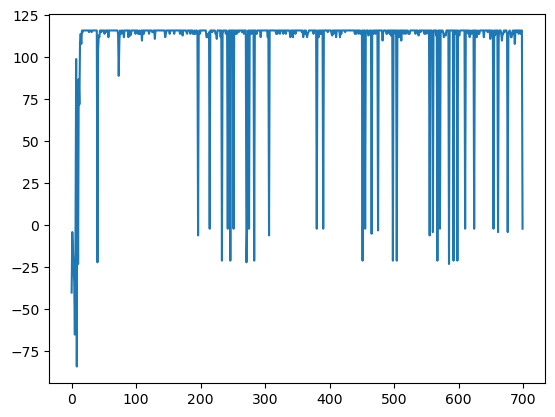

Graph for length:


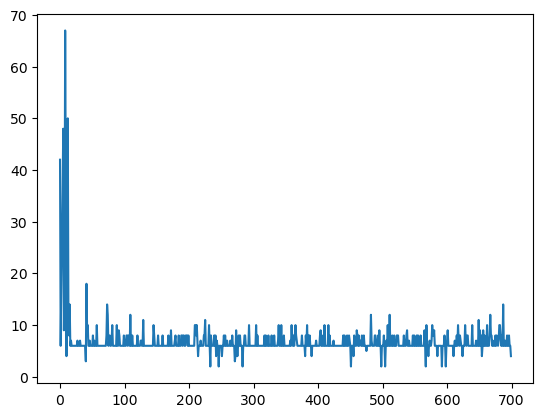

Graph for time:


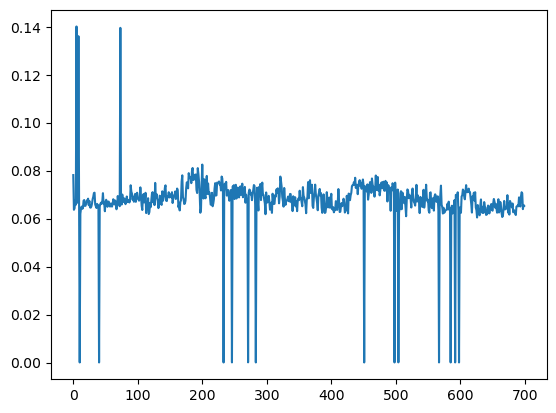

In [115]:
sarsa_SmallQ,sarsa_SmallRewards,sarsa_SmallLenght=RLWithSarsa(700,smallerEnv)

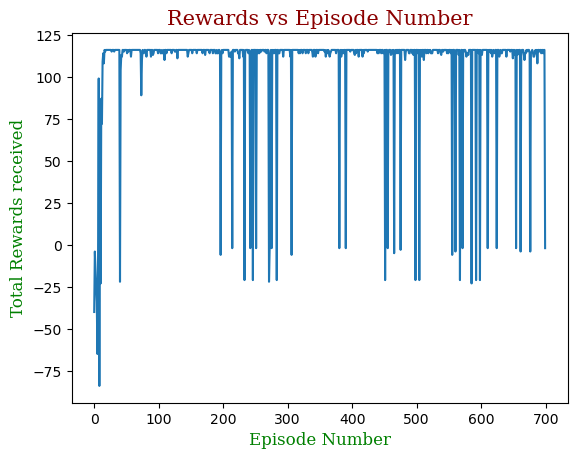

In [116]:
font1 = {'family':'serif','color':'darkred','size':15}
font2 = {'family':'serif','color':'green','size':12}

plt.plot(sarsa_SmallRewards[:700])
plt.xlabel("Episode Number", fontdict=font2)
plt.ylabel("Total Rewards received", fontdict=font2)
plt.title("Rewards vs Episode Number", fontdict=font1)
plt.show()

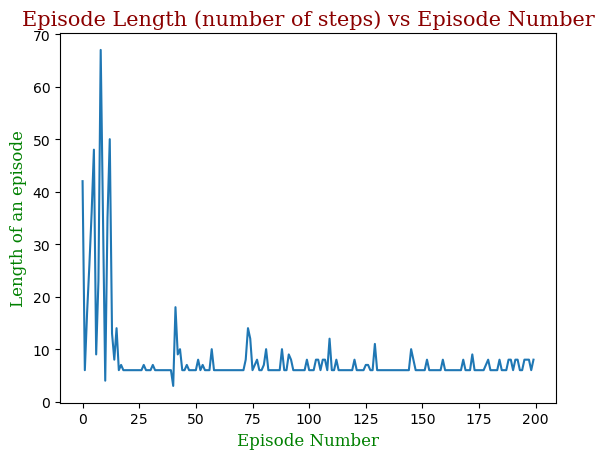

In [117]:
plt.plot(sarsa_SmallLenght[:200])
plt.xlabel("Episode Number",fontdict=font2)
plt.ylabel("Length of an episode",fontdict=font2)
plt.title("Episode Length (number of steps) vs Episode Number",fontdict=font1)
plt.show()

# UI for showing the paths

# Environment with negative bots introduced

In [24]:
from tkinter import *
from PIL import ImageTk, Image

canvasHeight = 500
canvasWidth = 500

class MazeUI():
    def __init__(self, root, canvas, maze):
        self.canvas = canvas
        self.maze = maze
        self.root = root
        self.steps = 0
        self.x , self.y = None, None
        self.actions = []
        self.goodBots , self.badBots = None, None
        self.images = {}
        
        mazeHeight = len(self.maze)
        mazeWidth = len(self.maze[0])
        
        self.height = int(canvasHeight/mazeHeight)
        self.width = int(canvasWidth/mazeWidth)
        
    def isGoal(self, x ,y):
        return self.maze[y][x] == 'G'
    
    def isPit(self, x ,y):
        return self.maze[y][x] == 'P'
    
    def initImages(self):
        self.images['goodBot'] = self.getImageForCanvas("goodBot.jpg")
        self.images['badBot'] = self.getImageForCanvas("badBot.jpg")
        self.images['agent'] = self.getImageForCanvas("Agent.jpg")
        self.images['wall'] = self.getImageForCanvas("wall.jpg")
        self.images['goal'] = self.getImageForCanvas("Goal.jpg")
        self.images['footprint'] = self.getImageForCanvas("Footprint.jpg")
        self.images['pit'] = self.getImageForCanvas("pit.jpg")
        
        self.images['goodBot_pastAgent'] = self.getImageForCanvas("goodBot_pastAgent.jpg")
        self.images['badBot_pastAgent'] = self.getImageForCanvas("badBot_pastAgent.jpg")
        
        self.images['goodBot_withAgent'] = self.getImageForCanvas("goodBot_withAgent.jpg")
        self.images['badBot_withAgent'] = self.getImageForCanvas("badBot_withAgent.jpg")
        
        self.images['goal_withAgent'] = self.getImageForCanvas("goal_withAgent.jpg")
        self.images['pit_withAgent'] = self.getImageForCanvas("pit_withAgent.jpg")
        
        

    def showAgent(self,x, y):
        if (y,x) in self.goodBots:
            self.showImage(x, y, self.images['goodBot_withAgent'])
        elif (y,x) in self.badBots:
            self.showImage(x, y, self.images['badBot_withAgent'])
        elif self.isGoal(x,y):
            self.showImage(x, y, self.images['goal_withAgent'])
        elif self.isPit(x,y):
            self.showImage(x, y, self.images['pit_withAgent'])
        else:
            self.showImage(x, y, self.images['agent'])
    
    def showBot(self,x,y):
        if (y,x) in self.goodBots:
            self.showImage(x, y, self.images['goodBot'])
        elif (y,x) in self.badBots:
            self.showImage(x, y, self.images['badBot'])
    
    def showWall(self,x,y):
        self.showImage(x, y,self.images['wall'])
     
    def showGoal(self,x,y):
        self.showImage(x, y, self.images['goal'])
    
    def showPit(self,x,y):
        self.showImage(x, y, self.images['pit'])
    
    def showFootprint(self,x, y):
        if (y,x) in self.goodBots:
            self.showImage(x, y, self.images['goodBot_pastAgent'])
            
        elif (y,x) in self.badBots:
            self.showImage(x, y, self.images['badBot_pastAgent'])
            
        else:
            self.showImage(x, y, self.images['footprint'])
    
    def showImage(self, x, y, image):
        coordX, coordY = (x*self.width, y*self.height)
        #Add image to the Canvas Items
        self.canvas.create_image(coordX, coordY, image=image, anchor=tk.NW)
        
    def getImageForCanvas(self, imageName):
        image_file = Image.open(imageName)
        resize_image = image_file.resize((self.height, self.width))
        return ImageTk.PhotoImage(resize_image)
    
    def showMaze(self):
        for y, row in enumerate(self.maze):
            for x, ch in enumerate(row):
                if self.maze[y][x] == 'W':
                    self.showWall(x,y)
                elif self.maze[y][x] == 'B':
                    self.showBot(x,y)
                elif self.maze[y][x] == 'G':
                    self.showGoal(x,y)
                elif self.maze[y][x] == 'P':
                    self.showPit(x,y)


# def createUI(maze, initialCoordinates, actions):
    def moveTheAgent(self):        
        new_x, new_y = self.x , self.y
        new_direction = self.actions[self.steps]      

        if(new_direction == 'R'):
            new_x += 1
        if(new_direction == 'D'):
            new_y += 1
        if(new_direction == 'L'):
            new_x -= 1
        if(new_direction == 'U'):
            new_y -= 1

        self.showFootprint(self.x , self.y)
        self.x , self.y = new_x, new_y
        self.showAgent(self.x , self.y)
        self.steps += 1

        if(self.isGoal(self.x, self.y) or self.isPit(self.x, self.y)):
            print("Total steps: " + str(self.steps))
            print("Pop up of the UI needs to be closed to get to the next cell.")
        else:
            self.root.after(500, self.moveTheAgent)

    def displayUI(self, goodBots, badBots, initialCoordinates, actions): 
        self.goodBots = goodBots
        self.badBots = badBots
        self.actions = actions
        self.y , self.x = initialCoordinates
        
        self.root.title("PIC")
        
        self.initImages()
        self.showMaze()
        
        self.moveTheAgent()
        self.canvas.pack()

def generateUI(maze, initialPos, actions, goodPositions,badPositions):    
    master = tk.Tk()

    canvas = tk.Canvas(width=canvasWidth, height=canvasHeight, bg='white')

    ui = MazeUI(master, canvas, maze)
    ui.displayUI(goodPositions, badPositions, initialPos, actions)

    master.mainloop()

In [12]:
##Helper method to get all actions from Q-table (required for the UI)
def getActions(q_table, env): 
    env.reset()
    actions = []
    done = False
    totalReward = 0
    while not done:
        row, col = env.agentPosition
        
        qtable_state = getStateFromCoordinate(env.agentPosition, env.maze)
        qtable_action = int(np.argmax(q_table[qtable_state]))

        newAction = env.actions[qtable_action]
        actions.append(newAction)
        
        #code to not break the kernel.
        if len(actions)>1000:
            print("Too many steps")
            break
            
            
        next_state_coor, reward, done, _ = env.step(newAction)
        totalReward+=reward
    return actions

In [13]:
def getGoodAndBadBots(botResponses):
    goodBots, badBots = [], []
    
    for response in botResponses:
        sentimentFound = sentiment_analysis(botResponses[response])[0]['label']
        if sentimentFound == "POSITIVE":
            goodBots.append(response)
        elif sentimentFound == "NEGATIVE":
            badBots.append(response)

    return goodBots, badBots

In [14]:
def ShowUI(env, currentQTable):
    currentMaze = env.maze
    agentPositon = env.initialAgentPosition
    actions = getActions(currentQTable, env)
    env.reset()
    print(env.maze)
    goodPositions, badPositions = getGoodAndBadBots(env.botResponses)
    generateUI(currentMaze.tolist(), agentPositon, actions, goodPositions, badPositions)    

### UI small maze Q-learning

In [204]:
ShowUI(smallerEnv ,smallQ)

[['A' '0' '0' 'B']
 ['0' '0' 'B' 'P']
 ['P' '0' '0' '0']
 ['B' '0' '0' 'G']]
Total steps: 6
Pop up of the UI needs to be closed to get to the next cell.


### UI small maze SARSA

In [205]:
ShowUI(smallerEnv ,sarsa_SmallQ)

[['A' '0' '0' 'B']
 ['0' '0' 'B' 'P']
 ['P' '0' '0' '0']
 ['B' '0' '0' 'G']]
Total steps: 6
Pop up of the UI needs to be closed to get to the next cell.


### UI big maze with all positive bots

For maze:
[['P' '0' 'W' '0' '0' '0' '0' 'W' '0' 'A']
 ['P' '0' 'W' '0' '0' '0' '0' 'W' '0' '0']
 ['P' '0' 'W' '0' '0' '0' '0' 'W' '0' 'B']
 ['P' '0' 'W' '0' '0' '0' '0' 'B' '0' '0']
 ['P' '0' 'W' '0' 'B' 'W' '0' '0' '0' '0']
 ['0' '0' 'B' '0' '0' 'W' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' 'W' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' 'W' '0' '0' '0' '0']
 ['0' '0' 'B' '0' '0' 'W' '0' '0' '0' '0']
 ['G' '0' '0' '0' '0' 'W' '0' '0' '0' '0']]
Graph for episode lenght of 200:
Episode: 0 Length: 160 Total Reward:  -95
Episode: 1 Length: 506 Total Reward:  -441
Episode: 2 Length: 568 Total Reward:  -362
Episode: 3 Length: 411 Total Reward:  -205
Episode: 4 Length: 172 Total Reward:  -128
Episode: 5 Length: 516 Total Reward:  -310
Episode: 6 Length: 112 Total Reward:  52
Episode: 7 Length: 371 Total Reward:  -186
Episode: 8 Length: 262 Total Reward:  -77
Episode: 9 Length: 364 Total Reward:  -158
Episode: 10 Length: 286 Total Reward:  -101
Episode: 11 Length: 127 Total Reward:  79
Episode: 12 Le

Episode: 182 Length: 20 Total Reward:  186
Episode: 183 Length: 18 Total Reward:  188
Episode: 184 Length: 21 Total Reward:  185
Episode: 185 Length: 20 Total Reward:  186
Episode: 186 Length: 18 Total Reward:  188
Episode: 187 Length: 21 Total Reward:  185
Episode: 188 Length: 20 Total Reward:  186
Episode: 189 Length: 18 Total Reward:  188
Episode: 190 Length: 20 Total Reward:  186
Episode: 191 Length: 20 Total Reward:  186
Episode: 192 Length: 19 Total Reward:  187
Episode: 193 Length: 18 Total Reward:  188
Episode: 194 Length: 21 Total Reward:  185
Episode: 195 Length: 20 Total Reward:  186
Episode: 196 Length: 20 Total Reward:  186
Episode: 197 Length: 23 Total Reward:  183
Episode: 198 Length: 20 Total Reward:  186
Episode: 199 Length: 20 Total Reward:  186
Graph for rewards:


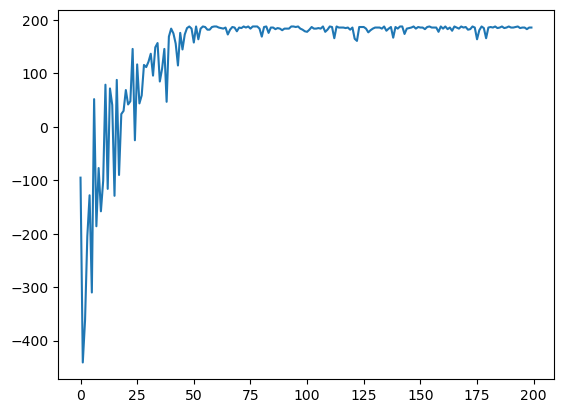

Graph for lenght:


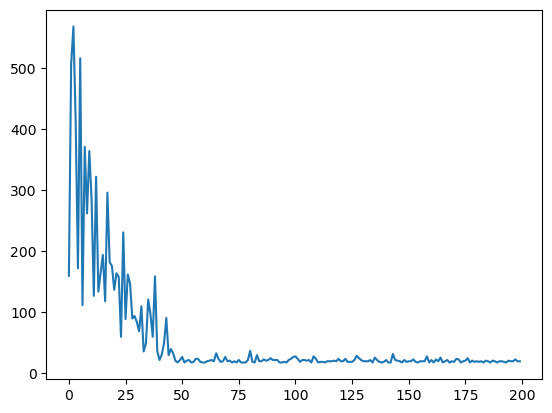

Graph for time:


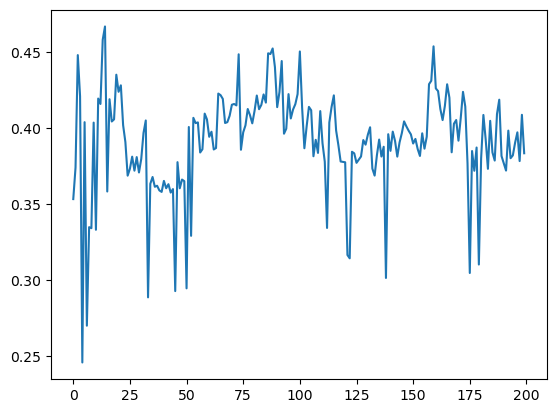

[0.3533989 0.3741921 0.4482221 0.4211031 0.2458071 0.404052  0.2700336
 0.3349188 0.3342489 0.4037656 0.3331904 0.419615  0.4160414 0.4583628
 0.4670705 0.358397  0.4191559 0.4045013 0.4059126 0.4353135 0.4240621
 0.4283253 0.4020816 0.3909506 0.368826  0.3733907 0.3813535 0.3721248
 0.3810507 0.370931  0.3798266 0.39696   0.4051735 0.2886865 0.3634737
 0.3679509 0.3614997 0.3621876 0.3591111 0.3581361 0.3653769 0.3605423
 0.3632094 0.3576934 0.3599989 0.2928184 0.3777244 0.3605099 0.366253
 0.3652188 0.2946265 0.4008756 0.3292103 0.4069199 0.403433  0.4039094
 0.3840819 0.3862156 0.4096863 0.4058967 0.3944213 0.3977516 0.3860752
 0.3870204 0.4228889 0.4218705 0.4193766 0.4034988 0.4040605 0.4082312
 0.4155285 0.4160357 0.4151011 0.4487492 0.3858865 0.3973566 0.4019738
 0.4127227 0.4086388 0.4032837 0.4114376 0.4215869 0.4125958 0.4154456
 0.4223267 0.4169394 0.4494166 0.4489355 0.4525936 0.4402995 0.4139571
 0.4238884 0.4443115 0.3964544 0.3997375 0.4225232 0.4064869 0.4124037
 0.4159

In [153]:
bigMaze_allPosEnv = Maze(biggerMaze, botResponses_allPositiveBots)
bigMaze_allPosQTable, graph, graph1 = AgentForReinforcementLearning(200, bigMaze_allPosEnv)

In [206]:
ShowUI(bigMaze_allPosEnv ,bigMaze_allPosQTable)

[['P' '0' 'W' '0' '0' '0' '0' 'W' '0' 'A']
 ['P' '0' 'W' '0' '0' '0' '0' 'W' '0' '0']
 ['P' '0' 'W' '0' '0' '0' '0' 'W' '0' 'B']
 ['P' '0' 'W' '0' '0' '0' '0' 'B' '0' '0']
 ['P' '0' 'W' '0' 'B' 'W' '0' '0' '0' '0']
 ['0' '0' 'B' '0' '0' 'W' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' 'W' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' 'W' '0' '0' '0' '0']
 ['0' '0' 'B' '0' '0' 'W' '0' '0' '0' '0']
 ['G' '0' '0' '0' '0' 'W' '0' '0' '0' '0']]
Total steps: 18
Pop up of the UI needs to be closed to get to the next cell.


### UI big maze with all positive but one negative bot

For maze:
[['P' '0' 'W' '0' '0' '0' '0' 'W' '0' 'A']
 ['P' '0' 'W' '0' '0' '0' '0' 'W' '0' '0']
 ['P' '0' 'W' '0' '0' '0' '0' 'W' '0' 'B']
 ['P' '0' 'W' '0' '0' '0' '0' 'B' '0' '0']
 ['P' '0' 'W' '0' 'B' 'W' '0' '0' '0' '0']
 ['0' '0' 'B' '0' '0' 'W' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' 'W' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' 'W' '0' '0' '0' '0']
 ['0' '0' 'B' '0' '0' 'W' '0' '0' '0' '0']
 ['G' '0' '0' '0' '0' 'W' '0' '0' '0' '0']]
Graph for episode lenght of 700:
Episode: 0 Length: 247 Total Reward:  -182
Episode: 1 Length: 393 Total Reward:  -328
Episode: 2 Length: 243 Total Reward:  -178
Episode: 3 Length: 624 Total Reward:  -458
Episode: 4 Length: 468 Total Reward:  -323
Episode: 5 Length: 268 Total Reward:  -83
Episode: 6 Length: 461 Total Reward:  -276
Episode: 7 Length: 410 Total Reward:  -244
Episode: 8 Length: 252 Total Reward:  -86
Episode: 9 Length: 263 Total Reward:  -219
Episode: 10 Length: 184 Total Reward:  -20
Episode: 11 Length: 281 Total Reward:  -96
Episode: 12 

Episode: 182 Length: 18 Total Reward:  167
Episode: 183 Length: 20 Total Reward:  165
Episode: 184 Length: 26 Total Reward:  159
Episode: 185 Length: 20 Total Reward:  165
Episode: 186 Length: 22 Total Reward:  163
Episode: 187 Length: 18 Total Reward:  167
Episode: 188 Length: 18 Total Reward:  167
Episode: 189 Length: 20 Total Reward:  165
Episode: 190 Length: 22 Total Reward:  163
Episode: 191 Length: 20 Total Reward:  165
Episode: 192 Length: 19 Total Reward:  166
Episode: 193 Length: 18 Total Reward:  167
Episode: 194 Length: 19 Total Reward:  166
Episode: 195 Length: 25 Total Reward:  160
Episode: 196 Length: 19 Total Reward:  166
Episode: 197 Length: 18 Total Reward:  167
Episode: 198 Length: 18 Total Reward:  167
Episode: 199 Length: 26 Total Reward:  159
Episode: 200 Length: 20 Total Reward:  165
Episode: 201 Length: 18 Total Reward:  167
Episode: 202 Length: 20 Total Reward:  165
Episode: 203 Length: 22 Total Reward:  163
Episode: 204 Length: 18 Total Reward:  167
Episode: 20

Episode: 373 Length: 22 Total Reward:  163
Episode: 374 Length: 22 Total Reward:  163
Episode: 375 Length: 23 Total Reward:  162
Episode: 376 Length: 20 Total Reward:  165
Episode: 377 Length: 22 Total Reward:  163
Episode: 378 Length: 20 Total Reward:  165
Episode: 379 Length: 18 Total Reward:  167
Episode: 380 Length: 18 Total Reward:  167
Episode: 381 Length: 18 Total Reward:  167
Episode: 382 Length: 18 Total Reward:  167
Episode: 383 Length: 23 Total Reward:  162
Episode: 384 Length: 22 Total Reward:  163
Episode: 385 Length: 18 Total Reward:  167
Episode: 386 Length: 18 Total Reward:  167
Episode: 387 Length: 20 Total Reward:  165
Episode: 388 Length: 20 Total Reward:  165
Episode: 389 Length: 20 Total Reward:  165
Episode: 390 Length: 18 Total Reward:  167
Episode: 391 Length: 17 Total Reward:  48
Episode: 392 Length: 18 Total Reward:  167
Episode: 393 Length: 19 Total Reward:  166
Episode: 394 Length: 18 Total Reward:  167
Episode: 395 Length: 26 Total Reward:  159
Episode: 396

Episode: 564 Length: 24 Total Reward:  161
Episode: 565 Length: 21 Total Reward:  164
Episode: 566 Length: 18 Total Reward:  167
Episode: 567 Length: 21 Total Reward:  164
Episode: 568 Length: 18 Total Reward:  167
Episode: 569 Length: 19 Total Reward:  166
Episode: 570 Length: 21 Total Reward:  164
Episode: 571 Length: 18 Total Reward:  167
Episode: 572 Length: 18 Total Reward:  167
Episode: 573 Length: 20 Total Reward:  165
Episode: 574 Length: 18 Total Reward:  167
Episode: 575 Length: 22 Total Reward:  163
Episode: 576 Length: 20 Total Reward:  165
Episode: 577 Length: 18 Total Reward:  167
Episode: 578 Length: 23 Total Reward:  162
Episode: 579 Length: 22 Total Reward:  163
Episode: 580 Length: 20 Total Reward:  165
Episode: 581 Length: 19 Total Reward:  166
Episode: 582 Length: 18 Total Reward:  167
Episode: 583 Length: 19 Total Reward:  166
Episode: 584 Length: 20 Total Reward:  165
Episode: 585 Length: 22 Total Reward:  163
Episode: 586 Length: 18 Total Reward:  167
Episode: 58

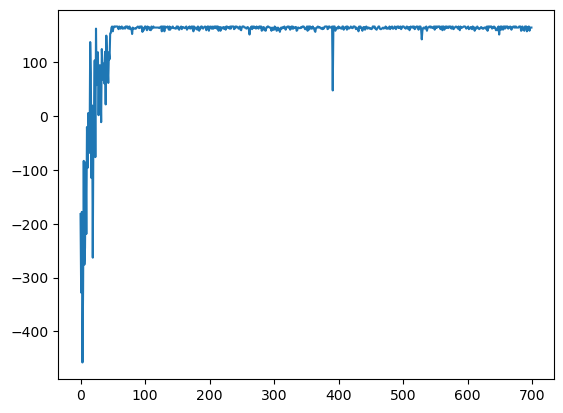

Graph for lenght:


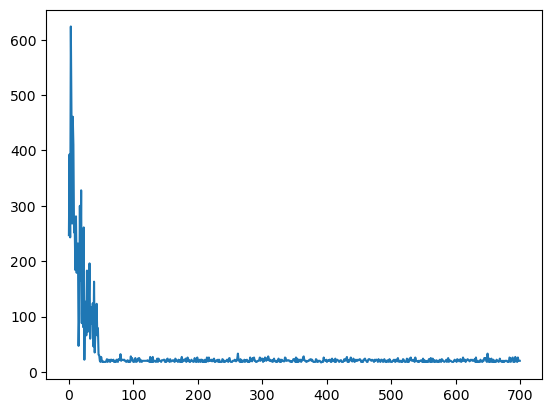

Graph for time:


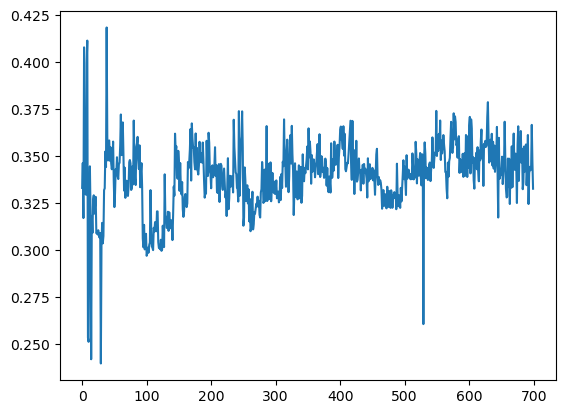

[0.3332285 0.3464633 0.3171988 0.4080385 0.3301007 0.3380721 0.3296169
 0.3995082 0.4116225 0.2536365 0.2513344 0.3290976 0.3447265 0.3210937
 0.2420505 0.318328  0.3092694 0.3269181 0.3292992 0.3195398 0.3235814
 0.328491  0.309108  0.3094363 0.3084703 0.3106934 0.3078733 0.3067566
 0.3092328 0.2398044 0.3030394 0.314629  0.3037224 0.3076633 0.3320848
 0.3330081 0.3526303 0.3443478 0.4186127 0.3603366 0.3478516 0.3581469
 0.3584762 0.3476742 0.3548287 0.3463321 0.3431727 0.346819  0.3578968
 0.3370164 0.3230247 0.3303709 0.3432277 0.3413502 0.3495541 0.3393983
 0.3379647 0.3461654 0.3465147 0.3558719 0.3723122 0.3506813 0.3649408
 0.368105  0.3515351 0.3318    0.3440104 0.3279552 0.3350718 0.3370596
 0.3366802 0.328974  0.3340378 0.3469696 0.3480746 0.3462819 0.3321309
 0.3331199 0.3446815 0.3350855 0.3690779 0.349362  0.3382148 0.3347749
 0.3551597 0.3569994 0.3603993 0.3481178 0.3432672 0.3558869 0.3335855
 0.3412169 0.3464113 0.3336128 0.3063189 0.3016523 0.3135703 0.3005193
 0.301

In [200]:
bigMaze_oneNegEnv = Maze(biggerMaze,botResponses_oneNegativeBots)
bigMaze_oneNegQTable, graph, graph1 = AgentForReinforcementLearning(700, bigMaze_oneNegEnv)

In [207]:
ShowUI(bigMaze_oneNegEnv ,bigMaze_oneNegQTable)

[['P' '0' 'W' '0' '0' '0' '0' 'W' '0' 'A']
 ['P' '0' 'W' '0' '0' '0' '0' 'W' '0' '0']
 ['P' '0' 'W' '0' '0' '0' '0' 'W' '0' 'B']
 ['P' '0' 'W' '0' '0' '0' '0' 'B' '0' '0']
 ['P' '0' 'W' '0' 'B' 'W' '0' '0' '0' '0']
 ['0' '0' 'B' '0' '0' 'W' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' 'W' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' 'W' '0' '0' '0' '0']
 ['0' '0' 'B' '0' '0' 'W' '0' '0' '0' '0']
 ['G' '0' '0' '0' '0' 'W' '0' '0' '0' '0']]
Total steps: 18
Pop up of the UI needs to be closed to get to the next cell.


### UI big maze with all positive but 2 negative bot

For maze:
[['P' '0' 'W' '0' '0' '0' '0' 'W' '0' 'A']
 ['P' '0' 'W' '0' '0' '0' '0' 'W' '0' '0']
 ['P' '0' 'W' '0' '0' '0' '0' 'W' '0' 'B']
 ['P' '0' 'W' '0' '0' '0' '0' 'B' '0' '0']
 ['P' '0' 'W' '0' 'B' 'W' '0' '0' '0' '0']
 ['0' '0' 'B' '0' '0' 'W' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' 'W' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' 'W' '0' '0' '0' '0']
 ['0' '0' 'B' '0' '0' 'W' '0' '0' '0' '0']
 ['G' '0' '0' '0' '0' 'W' '0' '0' '0' '0']]
Graph for episode lenght of 700:
Episode: 0 Length: 173 Total Reward:  -148
Episode: 1 Length: 655 Total Reward:  -630
Episode: 2 Length: 474 Total Reward:  -449
Episode: 3 Length: 287 Total Reward:  -161
Episode: 4 Length: 381 Total Reward:  -255
Episode: 5 Length: 225 Total Reward:  -221
Episode: 6 Length: 187 Total Reward:  -23
Episode: 7 Length: 81 Total Reward:  83
Episode: 8 Length: 102 Total Reward:  -58
Episode: 9 Length: 390 Total Reward:  -266
Episode: 10 Length: 361 Total Reward:  -197
Episode: 11 Length: 198 Total Reward:  -74
Episode: 12 Le

Episode: 182 Length: 18 Total Reward:  146
Episode: 183 Length: 22 Total Reward:  142
Episode: 184 Length: 20 Total Reward:  144
Episode: 185 Length: 18 Total Reward:  146
Episode: 186 Length: 18 Total Reward:  146
Episode: 187 Length: 18 Total Reward:  146
Episode: 188 Length: 20 Total Reward:  144
Episode: 189 Length: 18 Total Reward:  146
Episode: 190 Length: 18 Total Reward:  146
Episode: 191 Length: 25 Total Reward:  120
Episode: 192 Length: 20 Total Reward:  144
Episode: 193 Length: 28 Total Reward:  136
Episode: 194 Length: 20 Total Reward:  144
Episode: 195 Length: 20 Total Reward:  144
Episode: 196 Length: 18 Total Reward:  146
Episode: 197 Length: 20 Total Reward:  123
Episode: 198 Length: 19 Total Reward:  145
Episode: 199 Length: 18 Total Reward:  146
Episode: 200 Length: 20 Total Reward:  144
Episode: 201 Length: 19 Total Reward:  124
Episode: 202 Length: 20 Total Reward:  144
Episode: 203 Length: 18 Total Reward:  146
Episode: 204 Length: 20 Total Reward:  144
Episode: 20

Episode: 373 Length: 20 Total Reward:  144
Episode: 374 Length: 20 Total Reward:  144
Episode: 375 Length: 24 Total Reward:  140
Episode: 376 Length: 20 Total Reward:  123
Episode: 377 Length: 26 Total Reward:  119
Episode: 378 Length: 20 Total Reward:  144
Episode: 379 Length: 24 Total Reward:  121
Episode: 380 Length: 24 Total Reward:  140
Episode: 381 Length: 22 Total Reward:  142
Episode: 382 Length: 20 Total Reward:  144
Episode: 383 Length: 20 Total Reward:  144
Episode: 384 Length: 20 Total Reward:  125
Episode: 385 Length: 18 Total Reward:  146
Episode: 386 Length: 20 Total Reward:  144
Episode: 387 Length: 19 Total Reward:  145
Episode: 388 Length: 18 Total Reward:  146
Episode: 389 Length: 22 Total Reward:  142
Episode: 390 Length: 20 Total Reward:  144
Episode: 391 Length: 19 Total Reward:  145
Episode: 392 Length: 23 Total Reward:  122
Episode: 393 Length: 20 Total Reward:  144
Episode: 394 Length: 18 Total Reward:  146
Episode: 395 Length: 18 Total Reward:  146
Episode: 39

Episode: 564 Length: 21 Total Reward:  143
Episode: 565 Length: 22 Total Reward:  142
Episode: 566 Length: 22 Total Reward:  142
Episode: 567 Length: 20 Total Reward:  144
Episode: 568 Length: 26 Total Reward:  138
Episode: 569 Length: 19 Total Reward:  145
Episode: 570 Length: 18 Total Reward:  146
Episode: 571 Length: 22 Total Reward:  123
Episode: 572 Length: 22 Total Reward:  142
Episode: 573 Length: 18 Total Reward:  146
Episode: 574 Length: 18 Total Reward:  146
Episode: 575 Length: 19 Total Reward:  145
Episode: 576 Length: 20 Total Reward:  144
Episode: 577 Length: 18 Total Reward:  146
Episode: 578 Length: 22 Total Reward:  142
Episode: 579 Length: 18 Total Reward:  146
Episode: 580 Length: 20 Total Reward:  144
Episode: 581 Length: 18 Total Reward:  146
Episode: 582 Length: 18 Total Reward:  146
Episode: 583 Length: 18 Total Reward:  146
Episode: 584 Length: 19 Total Reward:  145
Episode: 585 Length: 20 Total Reward:  123
Episode: 586 Length: 20 Total Reward:  144
Episode: 58

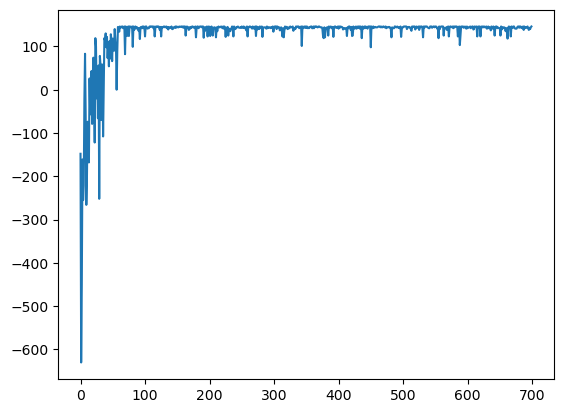

Graph for lenght:


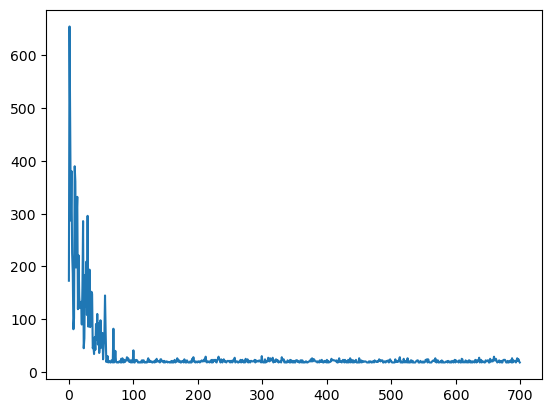

Graph for time:


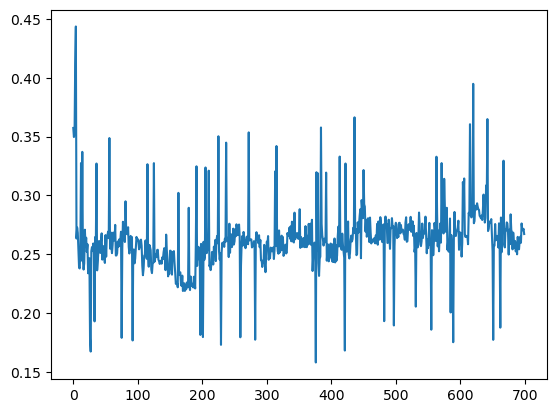

[0.3573465 0.3496439 0.3525398 0.4118508 0.4436497 0.2632937 0.2726355
 0.2681142 0.2536261 0.2385183 0.2378278 0.2553846 0.3274728 0.2445499
 0.3370008 0.244556  0.2368869 0.2422526 0.2707954 0.257421  0.2640124
 0.2518563 0.2584314 0.2337247 0.2443328 0.2465791 0.1783277 0.1671543
 0.2525692 0.2559658 0.2527044 0.2590592 0.2500231 0.1928151 0.2645989
 0.2596002 0.3270794 0.2362002 0.2439572 0.2526453 0.2612341 0.2564613
 0.2510264 0.2607899 0.2676929 0.2453756 0.2542296 0.2568284 0.2466766
 0.2425326 0.2662108 0.2478663 0.2648818 0.2660511 0.2691213 0.2635937
 0.3487568 0.2546922 0.2685124 0.2566962 0.2508527 0.2578821 0.2683534
 0.2618348 0.2616797 0.2748817 0.248803  0.2489397 0.2506958 0.260743
 0.2562626 0.2624601 0.2573129 0.2624749 0.2690651 0.1788217 0.254989
 0.2775365 0.2695962 0.2663719 0.2603436 0.2949409 0.2709011 0.2670872
 0.2670048 0.2728928 0.256162  0.2505563 0.2572759 0.265504  0.253488
 0.2645498 0.1765925 0.2538362 0.2539526 0.2422086 0.2462771 0.2563234
 0.264646

In [209]:
bigMaze_twoNegEnv = Maze(biggerMaze,botResponses_twoNegativeBots)
bigMaze_twoNegQTable, graph, graph1 = AgentForReinforcementLearning(700, bigMaze_twoNegEnv)

In [210]:
ShowUI(bigMaze_twoNegEnv ,bigMaze_twoNegQTable)

[['P' '0' 'W' '0' '0' '0' '0' 'W' '0' 'A']
 ['P' '0' 'W' '0' '0' '0' '0' 'W' '0' '0']
 ['P' '0' 'W' '0' '0' '0' '0' 'W' '0' 'B']
 ['P' '0' 'W' '0' '0' '0' '0' 'B' '0' '0']
 ['P' '0' 'W' '0' 'B' 'W' '0' '0' '0' '0']
 ['0' '0' 'B' '0' '0' 'W' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' 'W' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' 'W' '0' '0' '0' '0']
 ['0' '0' 'B' '0' '0' 'W' '0' '0' '0' '0']
 ['G' '0' '0' '0' '0' 'W' '0' '0' '0' '0']]
Total steps: 18
Pop up of the UI needs to be closed to get to the next cell.


For maze:
[['A' '0' '0' 'B']
 ['0' '0' 'B' 'P']
 ['P' '0' '0' '0']
 ['B' '0' '0' 'G']]
Graph for episode lenght of 70:
Episode: 0 Length: 13 Total Reward:  -32
Episode: 1 Length: 23 Total Reward:  -21
Episode: 2 Length: 40 Total Reward:  -38
Episode: 3 Length: 12 Total Reward:  -10
Episode: 4 Length: 13 Total Reward:  -30
Episode: 5 Length: 9 Total Reward:  -7
Episode: 6 Length: 3 Total Reward:  -22
Episode: 7 Length: 108 Total Reward:  -144
Episode: 8 Length: 10 Total Reward:  91
Episode: 9 Length: 43 Total Reward:  79
Episode: 10 Length: 53 Total Reward:  69
Episode: 11 Length: 17 Total Reward:  -15
Episode: 12 Length: 21 Total Reward:  82
Episode: 13 Length: 44 Total Reward:  -42
Episode: 14 Length: 55 Total Reward:  67
Episode: 15 Length: 7 Total Reward:  115
Episode: 16 Length: 7 Total Reward:  115
Episode: 17 Length: 8 Total Reward:  114
Episode: 18 Length: 6 Total Reward:  116
Episode: 19 Length: 12 Total Reward:  110
Episode: 20 Length: 8 Total Reward:  114
Episode: 21 Length: 

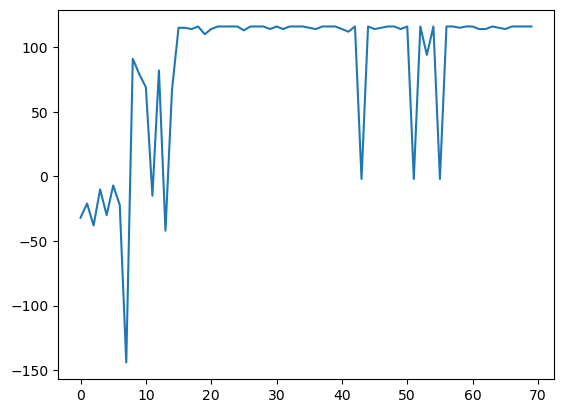

Graph for lenght:


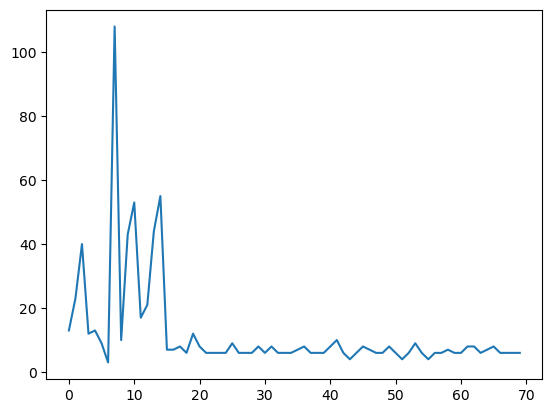

Graph for time:


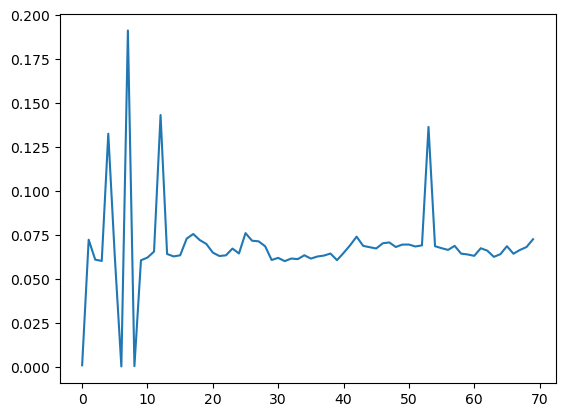

[7.468000e-04 7.217940e-02 6.081670e-02 6.007060e-02 1.324645e-01
 6.242560e-02 4.620000e-05 1.911990e-01 2.146000e-04 6.045910e-02
 6.200790e-02 6.540600e-02 1.431055e-01 6.405040e-02 6.265640e-02
 6.329040e-02 7.280130e-02 7.540890e-02 7.195410e-02 6.977170e-02
 6.482420e-02 6.289700e-02 6.327130e-02 6.712580e-02 6.434750e-02
 7.591870e-02 7.159380e-02 7.124270e-02 6.846100e-02 6.063250e-02
 6.182450e-02 5.997290e-02 6.146080e-02 6.112860e-02 6.332600e-02
 6.142210e-02 6.261100e-02 6.313680e-02 6.430210e-02 6.052850e-02
 6.460820e-02 6.897140e-02 7.390830e-02 6.867360e-02 6.790600e-02
 6.718100e-02 7.012320e-02 7.062200e-02 6.801940e-02 6.939510e-02
 6.940320e-02 6.830820e-02 6.895080e-02 1.363242e-01 6.847330e-02
 6.734710e-02 6.636870e-02 6.867310e-02 6.423670e-02 6.376670e-02
 6.298290e-02 6.730530e-02 6.593780e-02 6.240670e-02 6.392320e-02
 6.846200e-02 6.419410e-02 6.634520e-02 6.800630e-02 7.243650e-02]


In [10]:
smallerEnv = Maze(maze_small,botReponses_mazeSmall)
smallQ, smallQRewards, smallQLenght = AgentForReinforcementLearning(70, smallerEnv)

In [27]:
ShowUI(smallerEnv ,smallQ)

[['A' '0' '0' 'B']
 ['0' '0' 'B' 'P']
 ['P' '0' '0' '0']
 ['B' '0' '0' 'G']]
Total steps: 6
Pop up of the UI needs to be closed to get to the next cell.
